In [1]:
# Import the moduled needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the dataset provided in the problem statement 
url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv'
df=pd.read_csv(url,sep=',')
df.head(5)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [3]:
# Delete unnamed columns - Removes Unnamed columns in the dataframe. It is case insensitive
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)], axis=1,inplace=True) 
df.head(5)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


Details of the data distribution based on the Gender 
 --------------------------------------------------
Gender
F    16380293
M    19041199
Name: Count, dtype: int64


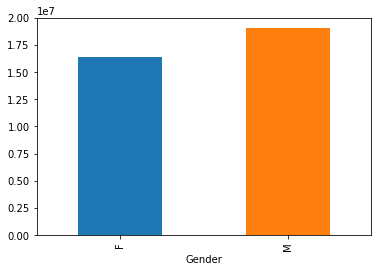

In [4]:
# Show the distribution of male and female.
# Provide the details of the dataset on the Gender column. 
print('Details of the data distribution based on the Gender \n','-'*50,sep=' ')
print(df.groupby(['Gender'])['Count'].sum())
df.groupby(['Gender'])['Count'].sum().plot(kind='bar',x='Gender',y='Count')
plt.show()

In [5]:
# Show the top 5 most preferred names. 
# Pick the top 5 by calculating the sum of the name counts per year. 

gp=df.groupby(['Name'])['Count'].sum()
print('The top 5 most preferred names are \n', '-'*32, sep=' ')
print(gp.nlargest(5))

The top 5 most preferred names are 
 --------------------------------
Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64


In [6]:
# Median Name Occurrence in the dataset. 
# Median Name occurrence from the sum of counts is selected to show the number of occurrences
print('Median Name Occurrence : ', gp.median())

Median Name Occurrence :  49.0


State  Gender
AK     F           26250
       M           37399
AL     F          215308
       M          260114
AR     F          129712
       M          162947
AZ     F          368567
       M          439691
CA     F         2414063
       M         2670584
Name: Count, dtype: int64


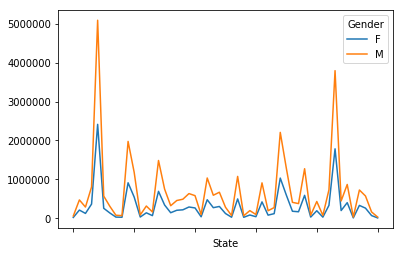

In [7]:
# Distribution of male and female born count by states
# Group the dataframe by State and Gender with the sum of counts of names
dfdn=df.groupby(['State','Gender'])['Count'].sum()
print(dfdn.head(10))
# Plot the occurrence of females in the States
dfdn.unstack().plot(kind='line',stacked=True)
plt.show()